# Exploratory Data Analysis of PISA 2012

### About PISA:-  
PISA is the OECD's Programme for International Student Assessment. Every three years it tests 15 year old students from all over the world in Reading, Mathematics and Science. The tests are designed to gauge how well the students master key subjects in order to be prepared for real-life situations in the adult world. This is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.  
Our data comprises of 485,490 students from 65 economies who took part in the PISA 2012 assessment of Reading, Mathematics and Science representing about 31.5 million 15-year-olds globally.   

I have done some preliminary Data Wrangling in the Data_Wrangling_PISA2012.ipynb and saved the clean data to pisa_clean.csv which I will be importing here to start with my Exploratory Analysis.

## Investigations:-

Following are the Explorations I undertook:    
### 1) Top 15 Countries of the world who appeared for PISA 2012 test in terms of Student Strength and Gender.  
### 2) Average Subject Score Distribution of Students.  
### 3) Top Performing Countries of PISA 2012.   
### 4) Impact of Parent Origin Country on Student Performance.
### 5)  Gender wise distribution of Average Subject scores and Top performers worldwide.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### What is the structure of your dataset?  
The pisa dataframe has 485490 rows and 9 columns, which are the columns of our interest. 

In [2]:
# Let us load in our data from pisa_clean.csv
pisa= pd.read_csv('pisa_clean.csv')
pisa.head(3)

,Country,Gender,Birth Country Student,Birth Country Father,Birth Country Mother,Avg Math Score,Avg Science Score,Avg Reading Score,Parent Country Origin
0,Albania,Female,Albania,Albania,Albania,366.18634,371.91348,261.01424,Same
1,Albania,Female,Albania,Albania,Albania,470.56396,478.12382,384.68832,Same
2,Albania,Female,Albania,Albania,Albania,505.53824,486.60946,405.18154,Same


In [3]:
# Size of our dataset
pisa.shape

(485490, 9)

In [4]:
# Count of Girls and Boys in our dataset
pisa.Gender.value_counts()

Female    245064
Male      240426
Name: Gender, dtype: int64

The number of Boys and Girls who appeared for the PISA 2012 test is very much the same. There has been a distribution of 49.5% of Boys and 50.5% of Girls who took the examination.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?  

I would like make use of the Test Scores columns in the Math, Science and Reading subjects as the Quantitative(Numerical) variables and the columns of Country, Gender and Parent Country Origin as the Qualitative(Categorical) variables for my Exploratory Data Analysis.  
I would like to investigate the relationships that exits between different pairs of these variables and what are the conclusions that we can arrive at.

#### Visualizations exploring these variables are as seen below along with the respective Conclusions mentioned under each plot.

## Univariate Exploration
In this section, let us investigate distributions of individual variables.  

### Visualization 1: Top 15 Countries of the world who appeared for PISA 2012 test in terms of Student Strength

In [5]:
# Let us get the count of countries in the order of the highest number of students appearing for the PISA 2012 test
country_count= pisa.Country.value_counts().head(15)
country_count

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
United States of America    10294
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Name: Country, dtype: int64

In [6]:
# Let use our base color for plots that do not use color encodings
base_color= sb.color_palette()[0]

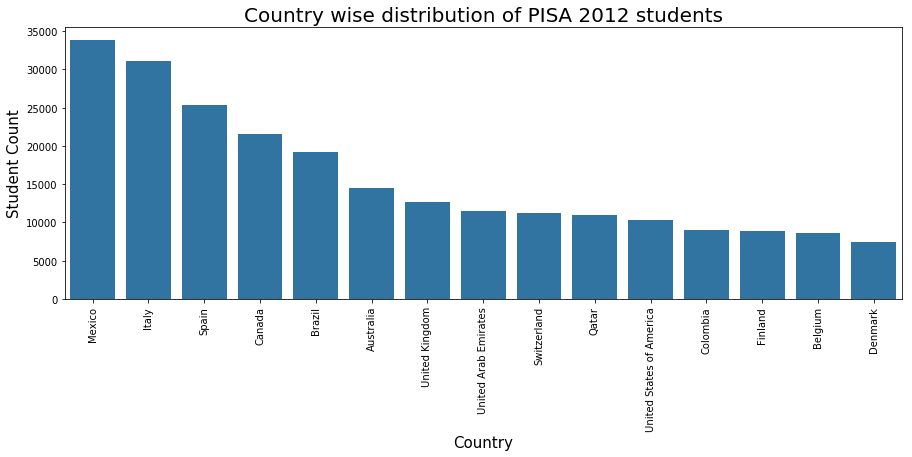

In [7]:
# Country wise distribution of PISA 2012 students 
plt.figure(figsize=(15,5))
sb.countplot(data= pisa, x= 'Country', color=base_color, order= country_count.index)
plt.xlabel('Country',fontsize= 15)
plt.ylabel('Student Count',fontsize= 15)
plt.xticks(rotation=90)
plt.title('Country wise distribution of PISA 2012 students',fontsize= 20);

####  Mexico is the country from where the maximum number of students appeared for the PISA 2012 test, compared to the rest of the world.  
* Italy stands as a close competitor scoring the second highest followed by Spain, Canada and Brazil.  
* United States of America is seen to have taken the 11th position in the Country wise distribution of PISA 2012 students. 

### Visualization 2: Average Subject Score Distribution of Students
Let us create a visualization for the average scores in Math, Science and Reading versus the Student Count.

In [8]:
# Let us get the statistics of each of the three quantitative variable columns
print('Math Score:\n{}\n'.format(pisa['Avg Math Score'].describe()))
print('Science Score:\n{}\n'.format(pisa['Avg Science Score'].describe()))
print('Reading Score:\n{}'.format(pisa['Avg Reading Score'].describe()))

Math Score:
count    485490.000000
mean        469.651234
std         100.786610
min          54.767080
25%         396.019620
50%         465.734520
75%         540.123060
max         903.107960
Name: Avg Math Score, dtype: float64

Science Score:
count    485490.000000
mean        475.808094
std          97.998470
min          25.158540
25%         405.762800
50%         475.512860
75%         546.381920
max         857.832900
Name: Avg Science Score, dtype: float64

Reading Score:
count    485490.000000
mean        472.006964
std          98.863310
min           6.445400
25%         405.044200
50%         475.477980
75%         542.831195
max         849.359740
Name: Avg Reading Score, dtype: float64


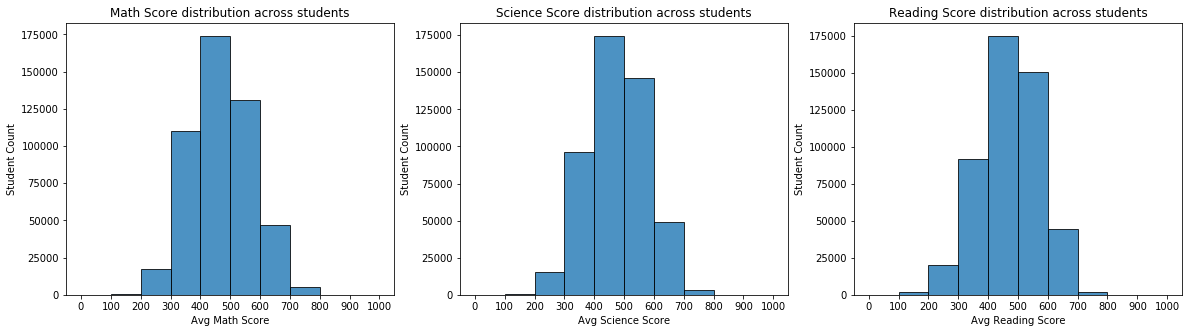

In [9]:
# Looking at the minimum and maximum values of these scores we chose the bins for our histograms as follows-
bins_scores= np.arange(0,950+100,100)

plt.figure(figsize = [20, 5])
#Let us plot our histograms
plt.subplot(1, 3, 1)
plt.hist(pisa['Avg Math Score'], bins = bins_scores, ec = 'black', alpha = 0.8);

plt.xticks(bins_scores)
plt.xlabel('Avg Math Score');
plt.ylabel('Student Count')
plt.title("Math Score distribution across students");


plt.subplot(1, 3, 2)
plt.hist(pisa['Avg Science Score'], bins = bins_scores, ec = 'black', alpha = 0.8);

plt.xticks(bins_scores)
plt.xlabel('Avg Science Score');
plt.ylabel('Student Count')
plt.title("Science Score distribution across students");


plt.subplot(1, 3, 3)
plt.hist(pisa['Avg Reading Score'], bins = bins_scores, ec = 'black', alpha = 0.8);

plt.xticks(bins_scores)
plt.xlabel('Avg Reading Score');
plt.ylabel('Student Count')
plt.title("Reading Score distribution across students");

These histograms clearly show that:-   
####  Close to 175000 students scored between 400-500 in all the three subjects making it the maximum number of student score range.  
* The second maximum number of students scoring between 500-600 is close to 130000 for Math Scores and slightly less than or equal to 150000 for Science and Reading respectively.
* The students scoring between 300-400 are close to 100000, making it the third highest range of scores.
* The highest scores of 700 and above are scored by only very few students.

### Visualization 3: Top Performing Countries of PISA 2012
Let us explore the Top Performing Countries of the PISA 2012 test. Along with that, let us also get the count of Top Performers in every country.

In [10]:
# Let us get the max of all the subject scores to determine the limit of reference
pisa['Avg Math Score'].max(), pisa['Avg Science Score'].max(), pisa['Avg Reading Score'].max()

(903.1079599999999, 857.8329, 849.3597399999999)

In [11]:
# Let us segregate the PISA students who scored above 800 and get their respective Countries for the three subjects
high_math_score= pisa[pisa['Avg Math Score']>800]['Country'].value_counts()
high_science_score= pisa[pisa['Avg Science Score']>800]['Country'].value_counts()
high_reading_score= pisa[pisa['Avg Reading Score']>800]['Country'].value_counts()

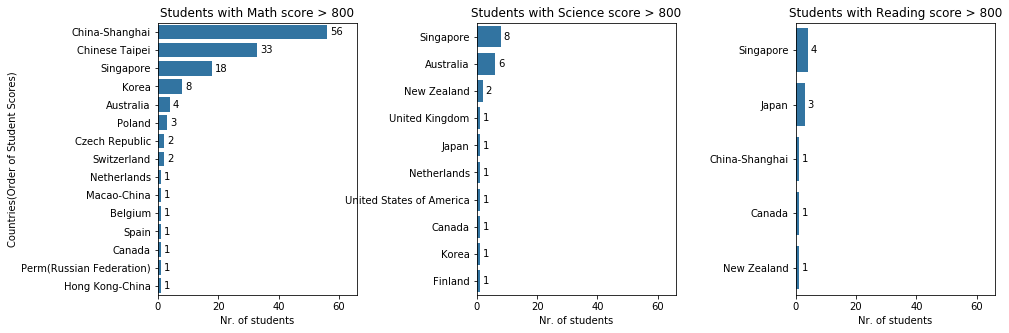

In [12]:
# Let us plot the Countries vs Student Count whose average subject scores are greater than 800.
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace= 0.6)
x_limit= max(high_math_score)+10

plt.subplot(1,3,1)
sb.barplot(x= high_math_score.values, y=high_math_score.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit)
plt.xlabel('Nr. of students')
plt.ylabel('Countries(Order of Student Scores)')
plt.title('Students with Math score > 800');

indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_math_score[label.get_text()] + 1, s = high_math_score[label.get_text()], va = 'center');

    
plt.subplot(1,3,2)
sb.barplot(x= high_science_score.values, y=high_science_score.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit)
plt.xlabel('Nr. of students')
plt.title('Students with Science score > 800');
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_science_score[label.get_text()] + 1, s = high_science_score[label.get_text()], va = 'center');


plt.subplot(1,3,3)
sb.barplot(x= high_reading_score.values, y=high_reading_score.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit)
plt.xlabel('Nr. of students')
plt.title('Students with Reading score > 800');
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_reading_score[label.get_text()] + 1, s = high_reading_score[label.get_text()], va = 'center');

These bar charts clearly indicate-  
####  China-Shanghai is home to the highest Math scorers in the world at PISA 2012, followed by Chinese Taipei, Singapore and Korea thereby highlighting the East-Asian talent.  
####  Singapore is the Top Performing Country in Science followed by and Australia.  
####  Singapore again has bagged the Top Performing Country in Reading; this time it's followed by Japan. 

## Bivariate Exploration

### Visualization 4: Top 15 Countries of the world who appeared for PISA 2012 test in terms of Student Strength and Gender

Let us find out the ratio of Female:Male in the Univariate plot of Country wise distribution of PISA 2012 students. Here, I have plotted my data with respect to two Categorical variables namely the Country and Gender columns using Clustered Bar Charts.

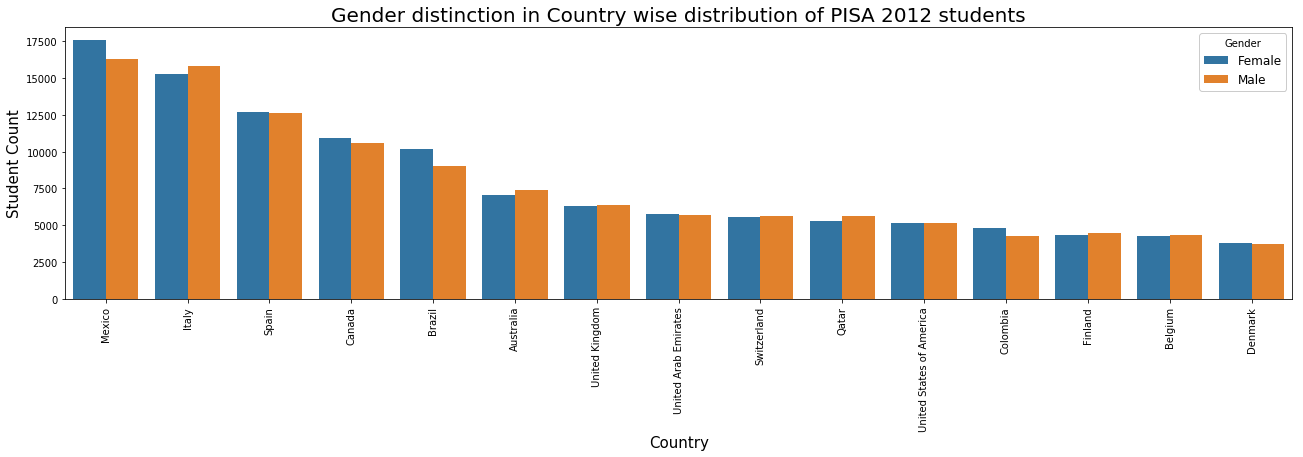

In [13]:
plt.figure(figsize=(22,5))
ax = sb.countplot(data = pisa, x = 'Country', hue = 'Gender', order= country_count.head(15).index)
ax.legend(loc = 'best', framealpha = 1, title = 'Gender', fontsize=12); 
plt.xlabel('Country',fontsize= 15)
plt.ylabel('Student Count',fontsize= 15)
plt.xticks(rotation=90)
plt.title('Gender distinction in Country wise distribution of PISA 2012 students',fontsize= 20);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I wanted to extend the Univariate plot of Country wise distribution of PISA 2012 students to include the Gender ratio in it. Here are my observations-

####  Mexico, with the maximum number of students, is clearly seen to have more Girls appearing for the test compared to Boys.
* Canada, Brazil and Columbia have a higher Female to Male ratio while Italy, Australia and Qatar have lower Female to Male ratio.
* The rest of the countries show very much similar Female to Male ratios as seen in our initial programmatic investigation of Gender value counts.

### Visualization 5: Impact of Parent Origin Country on Student Performance
Let us explore whether each of the subject scores have any impact on Students whose Parents come from the Same Country or Different Countries.  

In [14]:
pisa['Parent Country Origin'].value_counts()

Same         428025
Different     57465
Name: Parent Country Origin, dtype: int64

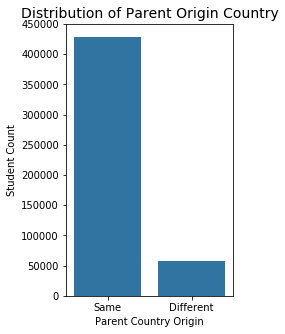

In [15]:
# A Univariate distribution of Parent Origin Country is plotted to show the difference in the number of students.
# Considering the value_counts of Parent Origin, y_ticks has been set accordingly.
plt.figure(figsize=(3,5))
sb.countplot(data= pisa, x='Parent Country Origin', color= base_color)
y_ticks= np.arange(0,450000+1, 50000)
plt.yticks(y_ticks)
plt.ylabel('Student Count')
plt.title('Distribution of Parent Origin Country', fontsize=14);

#### The number of students having their Parents from the Same Country is 7.45 times higher than those having Parents from Different Countries.

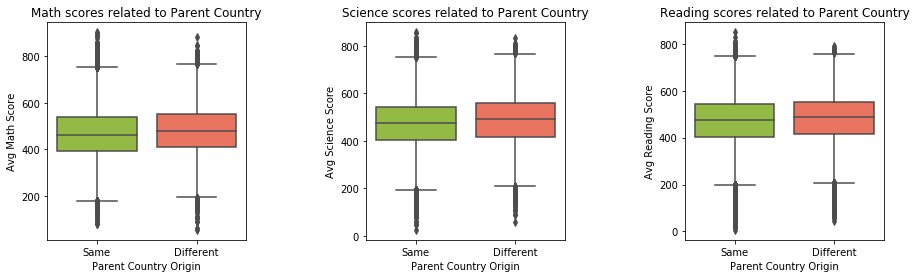

In [16]:
# Parent Country Origin vs Average Subject Scores
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace= 0.6)

plt.subplot(1,3,1)
my_pal = {"Same": "yellowgreen", "Different": "tomato"}
sb.boxplot(x= pisa['Parent Country Origin'], y= pisa['Avg Math Score'], palette= my_pal)
plt.title('Math scores related to Parent Country');

plt.subplot(1,3,2)
sb.boxplot(x= pisa['Parent Country Origin'], y= pisa['Avg Science Score'],palette= my_pal)
plt.title('Science scores related to Parent Country');


plt.subplot(1,3,3)
sb.boxplot(x= pisa['Parent Country Origin'], y= pisa['Avg Reading Score'],palette= my_pal)
plt.title('Reading scores related to Parent Country');

#### We can see here that students with Parent Origin from Different countries have scored slightly better in the PISA 2012 test compared to those whose Parent's Origin are Same. 

### Visualization 6: Top performing countries with students scoring high in two disciplines
We have already got the list of top performing countries of the PISA 2012 test from our Univariate Exploration. Let us extend that concept to understand whether we have top scoring students in two disciplines at the same time.

In [17]:
# Let us get our pisa data grouped under two subject scores(maximum values) at a time and their countries
high_math_and_science= pisa[(pisa['Avg Math Score']>=800) & (pisa['Avg Science Score']>=800)]['Country'].value_counts()
high_science_and_reading= pisa[(pisa['Avg Science Score']>=800) & (pisa['Avg Reading Score']>=800)]['Country'].value_counts()
high_math_and_reading= pisa[(pisa['Avg Math Score']>=800) & (pisa['Avg Reading Score']>=800)]['Country'].value_counts()

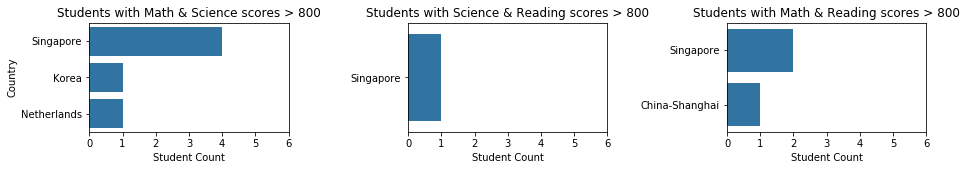

In [18]:
# Let us plot our data to find out the Top Performing countries in two disciplines at a time
plt.figure(figsize = [15, 2])
plt.subplots_adjust(wspace= 0.6)
x_limit_combo= max(high_math_and_science)+2

plt.subplot(1,3,1)
sb.barplot(x= high_math_and_science.values, y=high_math_and_science.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit_combo)
plt.xlabel('Student Count')
plt.ylabel('Country')
plt.title('Students with Math & Science scores > 800');

plt.subplot(1,3,2)
sb.barplot(x= high_science_and_reading.values, y=high_science_and_reading.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit_combo)
plt.xlabel('Student Count')
plt.title('Students with Science & Reading scores > 800');

plt.subplot(1,3,3)
sb.barplot(x= high_math_and_reading.values, y=high_math_and_reading.index, color= sb.color_palette()[0])
plt.xlim(0,x_limit_combo)
plt.xlabel('Student Count')
plt.title('Students with Math & Reading scores > 800');

#### Singapore is definitely the World Winner with it's students scoring the highest in all of the three disciplines.  
It is followed by Netherlands and Korea in the combination of Math and Science & China-Shanghai in Math & Reading.

## Multivariate Exploration

### Visualization 7: Correlation between Average Subject Scores. 
From the Univariate Histograms we learnt that the highest score range of students for all the three subjects were the same(400-500). We can also see from the previous visualization that there are students scoring high in two subjects at a time in the same PISA test. 

This kindles my interest to explore whether there is a relationship between all three subject scores.

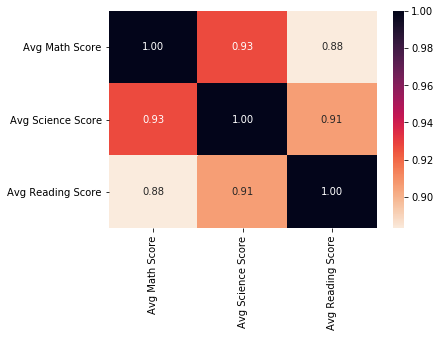

In [19]:
# Let us find the correlation between the three quantitative variables using a heatmap.
corr_vars= pisa[['Avg Math Score','Avg Science Score','Avg Reading Score']].corr()
sb.heatmap(corr_vars, annot = True, fmt = '.2f', cmap = 'rocket_r');

#### The Avg Math Score, Avg Science Score and Avg Reading Score variables have a high positive correlation between each other. 

### Visualization 8: Gender wise distribution of Average Subject scores

In Visualization 4 of the Bivariate Exploration we saw the Gender ratio grouped by countries. Now let us extend exploring the  same Gender ratio across the mean of all the three subject scores.

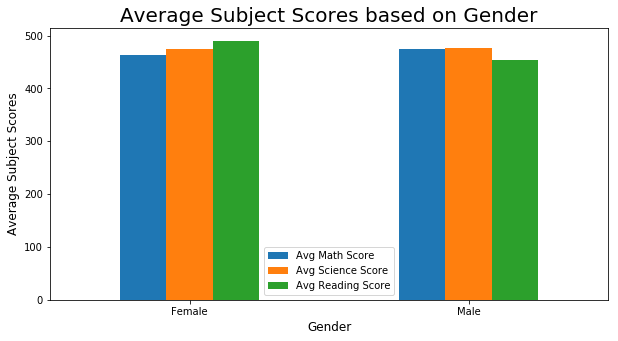

In [20]:
# Here we plot the three quantitative variables of average subject scores vs a categorical gender variable.
plt.rcParams['figure.figsize'] = [10, 5]
Gender_Scores= pisa.groupby(['Gender']).mean()[['Avg Math Score','Avg Science Score','Avg Reading Score']]
Gender_Scores.plot(kind='bar');
plt.xlabel('Gender', fontsize= 12)
plt.ylabel('Average Subject Scores',fontsize= 12)
plt.title('Average Subject Scores based on Gender',fontsize= 20)
plt.xticks(rotation=0)
plt.legend(loc='best');

The above bar graph gives us a clear depiction of the following-  

#### Girls score their highest in Reading followed by Science and Math.
#### Boys seem to score their highest in both Science and Math while their least scores are in Reading.

### Visualization 9: Gender wise distribution of Top Performers Worldwide

In the previous visualization, we saw how Girls and Boys fared in the three subject scores. Let us introduce a Country variable here, for all the three subject score distributions and see if our visualizations support our previous conclusions.

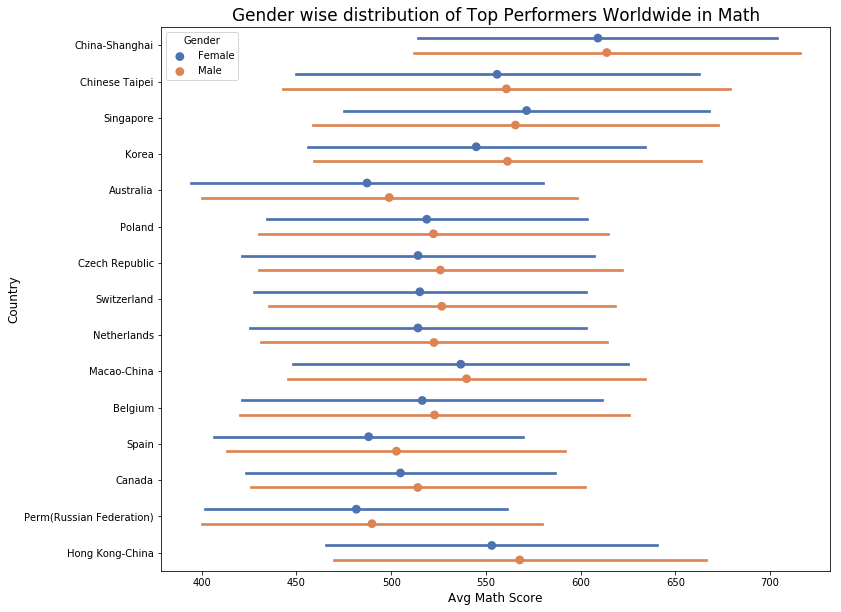

In [21]:
# Gender wise distribution of Top Performers Worldwide in Math
plt.figure(figsize=(12,10))
ax = sb.pointplot(data = pisa, y = 'Country', x = 'Avg Math Score', hue = 'Gender',order= high_math_score.index,
                  dodge = 0.4, ci = 'sd', palette = 'deep', linestyles = "")
plt.xlabel('Avg Math Score',fontsize= 12)
plt.ylabel('Country',fontsize= 12)
plt.title('Gender wise distribution of Top Performers Worldwide in Math', fontsize= 17);

#### Boys occupy the lead positions in the Top Math Scores worldwide except for Singapore where Girls take the lead. 

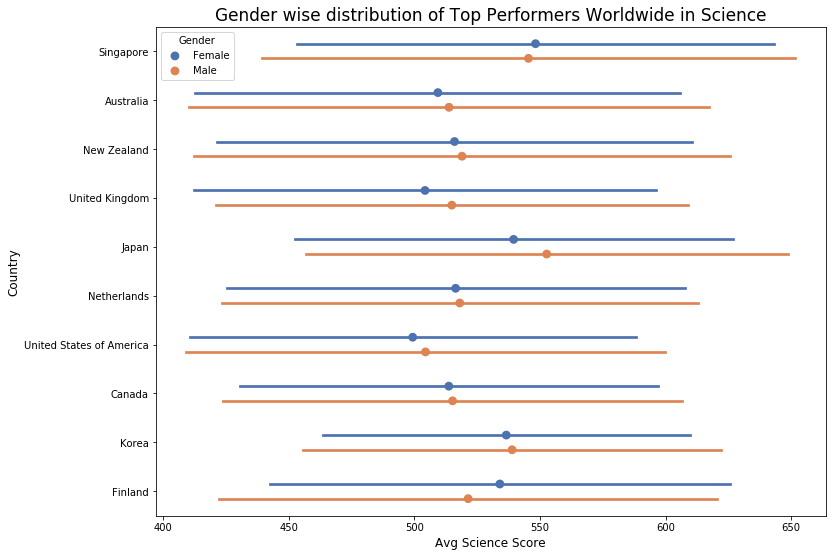

In [22]:
#Gender wise distribution of Top Performers Worldwide in Science
plt.figure(figsize=(12,9))
ax = sb.pointplot(data = pisa, y = 'Country', x = 'Avg Science Score', hue = 'Gender',order= high_science_score.index,
                  dodge = 0.3, ci = 'sd', palette = 'deep', linestyles = "")
plt.xlabel('Avg Science Score',fontsize= 12)
plt.ylabel('Country',fontsize= 12)
plt.title('Gender wise distribution of Top Performers Worldwide in Science', fontsize= 17);

#### Girls are the Top Performers in Science in Singapore and Finland, while Boys score similar or lead Girls in Science in the rest of the Top Performing Countries. 

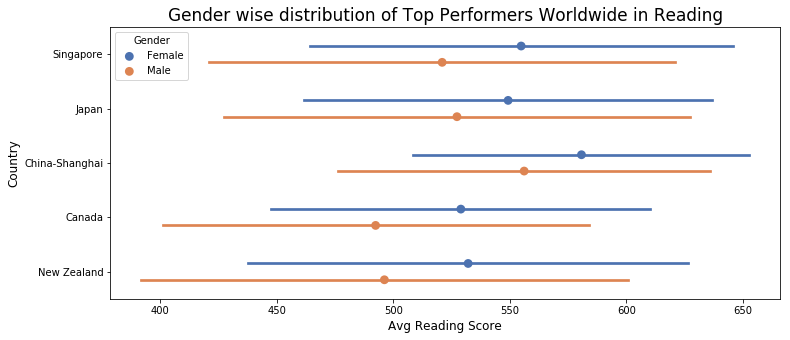

In [23]:
#Gender wise distribution of Top Performers Worldwide in Reading
plt.figure(figsize=(12,5))
ax = sb.pointplot(data = pisa, y = 'Country', x = 'Avg Reading Score', hue = 'Gender',order= high_reading_score.index,
                  dodge = 0.3, ci = 'sd', palette = 'deep', linestyles = "")
plt.xlabel('Avg Reading Score',fontsize= 12)
plt.ylabel('Country',fontsize= 12)
plt.title('Gender wise distribution of Top Performers Worldwide in Reading', fontsize= 17);

#### Girls are clearly the Top Performers Worldwide in Reading. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Yes. The plots in Visualization 9 clearly support what we concluded in Visualization 8. Here is the summary of points-
#### Girls lead Boys worldwide in Reading Scores in the PISA 2012 test.
#### Boys clearly lead Girls worldwide in Math Scores, except in Singapore.
#### Boys lead Girls or scored similar in Science Scores, except in Singapore and Finland.
#### Girls from Singapore lead in performance in all the three subjects worldwide.

## Conclusions:-  

* Mexico is topping the list with the maximum number of students appearing for PISA 2012, followed closely by Italy and then by Spain, Canada and Brazil. 
* The maximum number of students score between the range of 400-500 in all the three subjects followed by the second maximum number of students scoring between the 500-600 range.The highest scores of 700 and above are scored by only very few students. 
* China-Shanghai is home to the highest Math scorers in the world at PISA 2012, followed by Chinese Taipei, Singapore and Korea thereby highlighting the East-Asian talent.
* Singapore is the Top Performing Country in Science followed by and Australia.
* Singapore again has bagged the Top Performing Country in Reading; this time it's followed by Japan.
* Mexico, with the maximum number of students, is clearly seen to have more Girls appearing for the test compared to Boys. Canada, Brazil and Columbia have a higher Female to Male ratio while Italy, Australia and Qatar have lower Female to Male ratio.
* Students with Parent Origin from Different countries have scored better in the PISA 2012 test compared to those whose Parent's Origin are from the Same country.
* The Avg Math Score, Avg Science Score and Avg Reading Score columns show a high positive correlation between each other.
* Girls lead Boys worldwide in Reading Scores.
* Boys clearly lead Girls worldwide in Math Scores, except in Singapore.
* Boys lead Girls or scored similar in Science Scores, except in Singapore and Finland.
* Girls from Singapore lead in performance in all the three subjects worldwide.

### Resources include Google, Youtube, Stackoverflow and Python Documentation.